In [ ]:
# %load_ext autoreload
# %autoreload 1
# %aimport metaheuristics.algorithme_genetique

In [1]:
cd ..

d:\Git\dir\ICO\codes


In [2]:
from metaheuristics.algorithme_genetique import*
from metaheuristics.base_problem import *
from loading_models import *
from vrptw import VRPTW

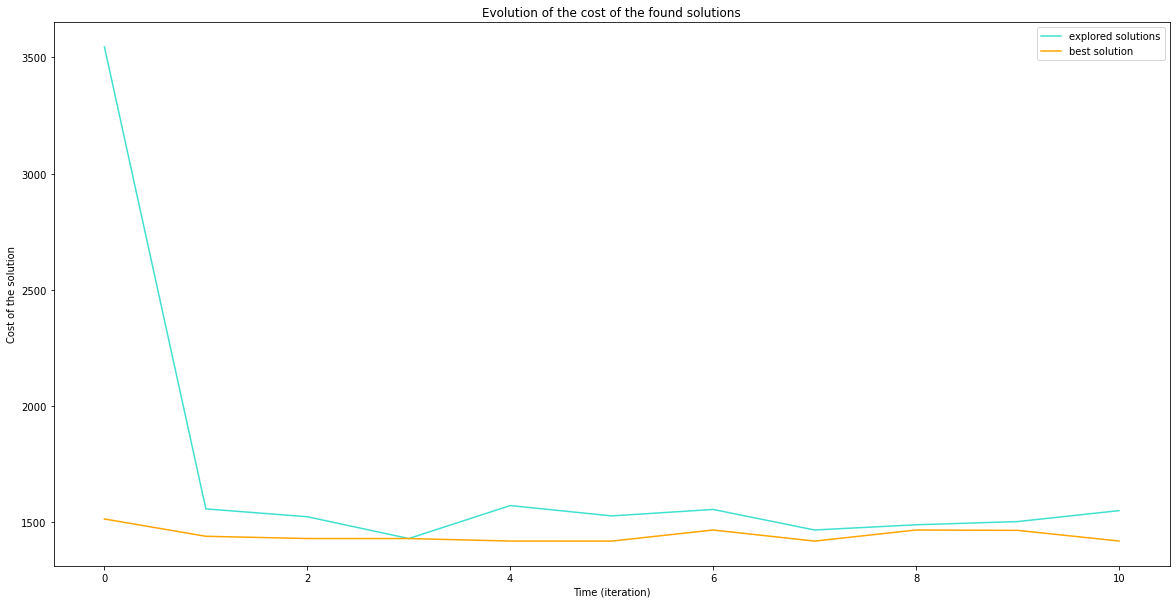

In [5]:
for _ in range(1):
    context = load_solomon('simple.csv', nb_cust=10, vehicle_speed=100)

# for route_id in customers['ROUTE_ID'].unique():
#     context = create_vrptw(CUSTOMER_DIR, DEPOTS_DIR, VEHICLES_DIR, DEPOTS_DISTANCES_DIR, CUSTOMER_DISTANCES_DIR, 2958047, MODE_VEHICLE="mean", vehicle_code=None)
   
    vrptw = VRPTW(context)
    neighborhood_params={   'verbose':0,
                            'init_sol':'random',
                            'choose_mode':'reverse_a_sequence',
                            'force_new_sol': True         
                        }
    instance =GeneticAlgorithm(num_evolu_per_search=100,neighborhood_params=neighborhood_params)
    instance.fit_search(vrptw)

    for _ in range(10):
        instance.search()
    instance.plot_evolution_cost()

DATA GENERATOR

In [ ]:
import random
import numpy as np
import pandas as pd

In [ ]:
def generator_demand(low=8,high=42):
    tmp=int(np.random.normal(20,10))
    while(tmp<low or tmp>high):
        tmp=int(np.random.normal(20,10))
    return tmp

def generator_time_window(right=1300,avr_during=400,sigma_start=150,sigma_during=13):
    variance_start=sigma_start*sigma_start
    variance_during=sigma_during*sigma_during
    start=int(np.random.normal(450,variance_start))
    while(start>1050 or start<0):
        start=int(np.random.normal(450,variance_start))  
    
    during=int(np.random.normal(avr_during,variance_during))
    while(during<120):
        during=int(np.random.normal(avr_during,variance_during))  
    end=min(start+during,right)
    return start,end

def generator_datum():
    time_window = generator_time_window(1440, 650)
    start_time, end_time = time_window
    return random.randint(0, 100),random.randint(0, 100),generator_demand(),start_time,end_time,int(np.random.normal(80,3))

def generator_data(id_start,id_end):
    for i in range(id_start,id_end+1):
        print(f'{i},'+(str(generator_datum())).replace(' ','').replace('(','').replace(')','')+',')

In [ ]:
def generate_dataframe(n_customers=10):
    columns = ['CUSTNO', 'XCOORD', 'YCOORD', 'DEMAND', 'READYTIME', 'DUETIME', 'SERVICETIME']
    df = pd.DataFrame(data=([i]+list(generator_datum()) for i in range(1, n_customers+1)), columns=columns)
    df['CAPACITY'] = 200
    return df

def generate_csv(filename, n_customers):
    df = generate_dataframe(n_customers)
    df.to_csv(filename, index=False)    

In [ ]:
cd data_solomon

In [ ]:
generate_csv('A50.csv', 50)